In [3]:
import yfinance as yf
import pandas as pd


In [4]:
tesla = yf.Ticker('TSLA')
tesla_stock_data = tesla.history(period="max")


In [5]:
tesla_stock_data.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [11]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'
html_data = requests.get(url)

soup = BeautifulSoup(html_data.content, 'html.parser')

tables = pd.read_html(html_data.content)
tesla_revenue = tables[1]  # Adjust the index if necessary

tesla_revenue.columns = ['Date', 'Revenue']
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"", regex=True)

tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

print(tesla_revenue.tail())



          Date Revenue
48  2010-09-30      31
49  2010-06-30      28
50  2010-03-31      21
52  2009-09-30      46
53  2009-06-30      27


In [12]:
gamestop = yf.Ticker('GME')
gamestop_stock_data = gamestop.history(period="max")
gamestop_stock_data.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [13]:

url_2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'
html_data_2 = requests.get(url_2)

soup_2 = BeautifulSoup(html_data_2.content, 'html.parser')

tables_2 = pd.read_html(html_data_2.content)
gme_revenue = tables_2[1]  # Adjust the index if necessary

gme_revenue.columns = ['Date', 'Revenue']
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"", regex=True)

gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

print(gme_revenue.tail())


          Date Revenue
57  2006-01-31    1667
58  2005-10-31     534
59  2005-07-31     416
60  2005-04-30     475
61  2005-01-31     709


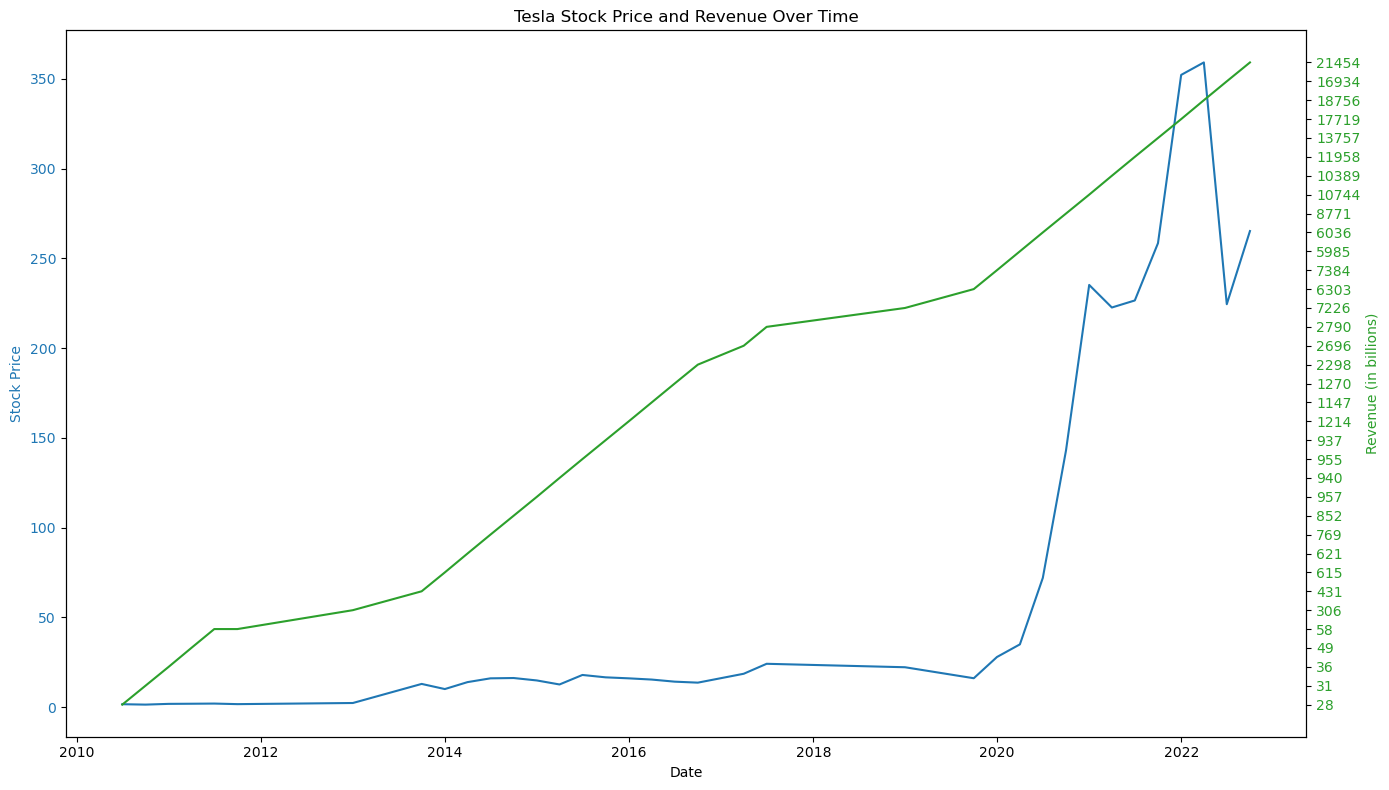

In [16]:
import matplotlib.pyplot as plt


tesla_stock_data.reset_index(inplace=True) 

tesla_stock_data['Date'] = pd.to_datetime(tesla_stock_data['Date']).dt.tz_localize(None)
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])

merged_tesla_df = pd.merge(tesla_stock_data, tesla_revenue, on='Date', how='inner')

fig, ax1 = plt.subplots(figsize=(14, 8))

ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price', color='tab:blue')
ax1.plot(merged_tesla_df['Date'], merged_tesla_df['Close'], color='tab:blue', label='Stock Price')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Revenue (in billions)', color='tab:green')
ax2.plot(merged_tesla_df['Date'], merged_tesla_df['Revenue'], color='tab:green', label='Revenue')
ax2.tick_params(axis='y', labelcolor='tab:green')

plt.title('Tesla Stock Price and Revenue Over Time')
fig.tight_layout()

plt.show()


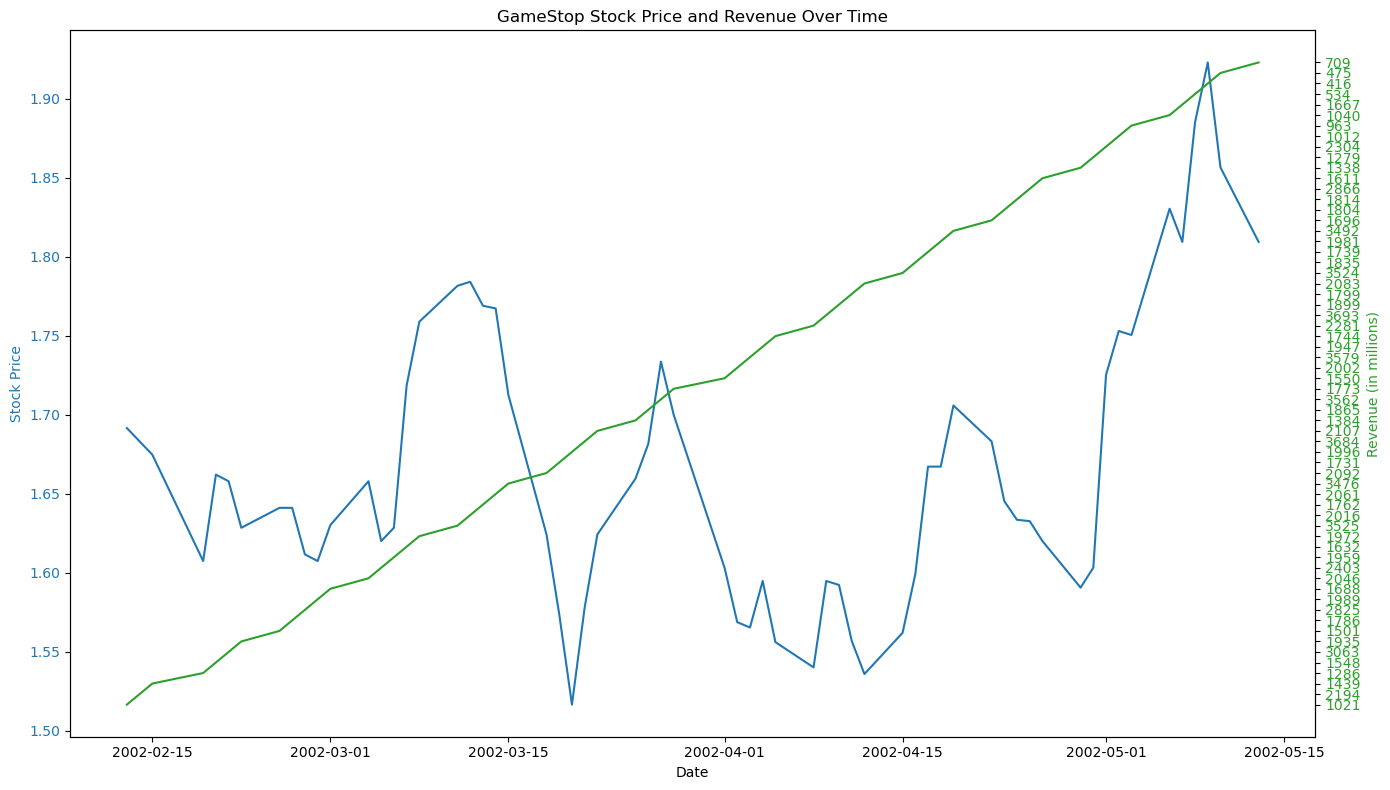

In [19]:


gamestop_stock_data.reset_index(inplace=True)  # Reset index to access 'Date' as a column

gamestop_stock_data['Date'] = pd.to_datetime(gamestop_stock_data['Date']).dt.tz_localize(None)
gme_revenue['Date'] = pd.to_datetime(gamestop_stock_data['Date'])

merged_gme_df = pd.merge(gamestop_stock_data, gme_revenue, on='Date', how='inner')

fig, ax1 = plt.subplots(figsize=(14, 8))

ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price', color='tab:blue')
ax1.plot(merged_gme_df['Date'], merged_gme_df['Close'], color='tab:blue', label='Stock Price')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Revenue (in millions)', color='tab:green')
ax2.plot(merged_gme_df['Date'], merged_gme_df['Revenue'], color='tab:green', label='Revenue')
ax2.tick_params(axis='y', labelcolor='tab:green')

plt.title('GameStop Stock Price and Revenue Over Time')
fig.tight_layout()

plt.show()
